In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [64]:
df = pd.read_csv('3_8_1_3_8_1-1.csv')
df.columns = ['time', 'voltage']
df

,time,voltage
0,0.0,32.965541
1,0.5,32.914965
2,1.0,32.904850
3,1.5,32.864389
4,2.0,32.854273
...,...,...
7163,3581.5,21.171181
7164,3582.0,21.161065
7165,3582.5,21.171181
7166,3583.0,21.201526


In [65]:
df.describe()

,time,voltage
count,7168.000000,7168.000000
mean,1791.750000,28.710232
std,1034.683849,3.561600
min,0.000000,20.098966
25%,895.875000,28.757605
50%,1791.750000,28.949794
75%,2687.625000,30.487309
max,3583.500000,35.251583


In [66]:
def plot_single_fig(df,w,h):
    fig= plt.figure(100,figsize=(w,h))
    plt.plot(df['time'], df['voltage'])
#     plt.axis('off') # To turn off the axis
    plt.xlabel('Time in μs')
    plt.ylabel('Volatage in V')
    plt.show()
#     return fig

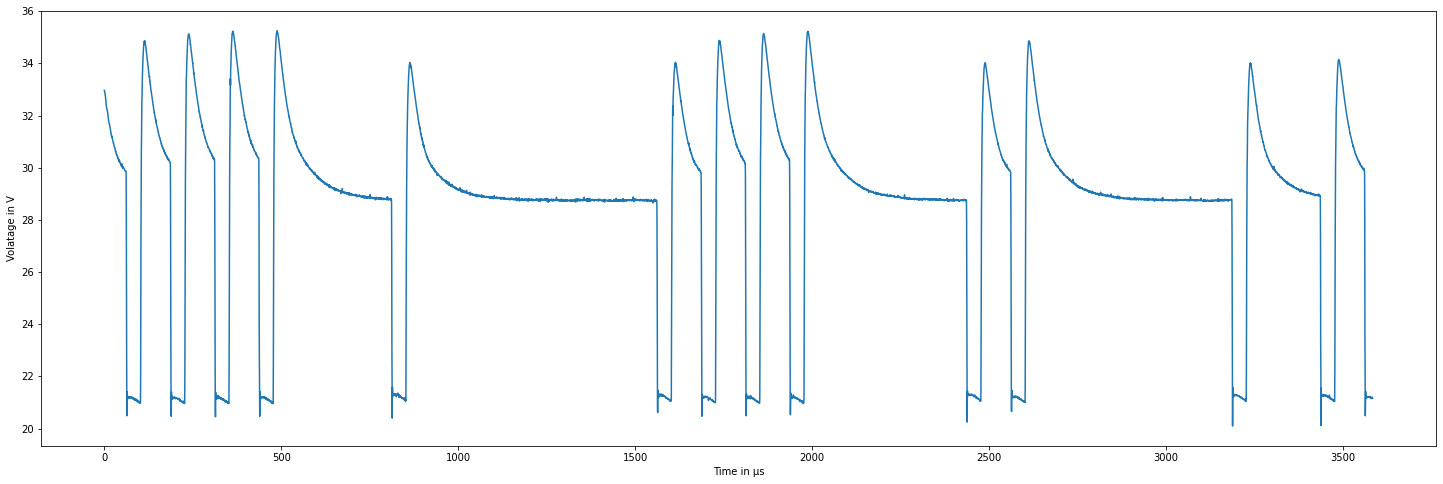

In [67]:
fig = plot_single_fig(df,25,8)
# fig.savefig('time_vs_voltage_plot.png',dpi=300,bbox_inches='tight',transparent=True,pad_inches=0) #save file without axis

In [68]:
df3 = pd.read_csv('3_8_2_3_8_2-500.csv')
df3.columns = ['time', 'voltage']

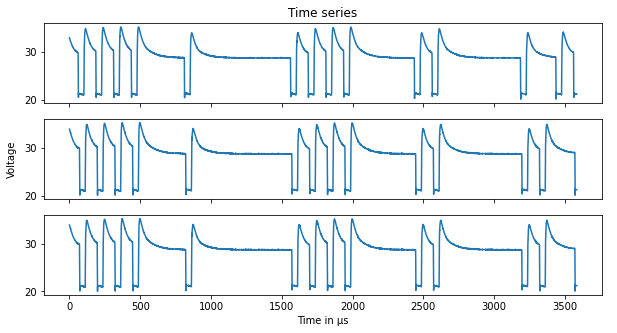

In [69]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(10,5))
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
axs[0].plot(df['time'], df['voltage'])
axs[1].plot(df2['time'], df3['voltage'])
axs[2].plot(df3['time'], df3['voltage'])
plt.title('Time series')
plt.ylabel('Voltage')
plt.xlabel('Time in μs')
plt.savefig('three.png')
plt.show()


### Shifting waveform to the left

In [70]:
df.head()

,time,voltage
0,0.0,32.965541
1,0.5,32.914965
2,1.0,32.904850
3,1.5,32.864389
4,2.0,32.854273


In [71]:
diff_1 = df['voltage'].diff()
diff_1

0            NaN
1      -0.050576
2      -0.010115
3      -0.040461
4      -0.010115
          ...   
7163   -0.020230
7164   -0.010115
7165    0.010115
7166    0.030346
7167   -0.040461
Name: voltage, Length: 7168, dtype: float64

In [72]:
df['difference'] = df['voltage'].diff()
df

,time,voltage,difference
0,0.0,32.965541,NaN
1,0.5,32.914965,-0.050576
2,1.0,32.904850,-0.010115
3,1.5,32.864389,-0.040461
4,2.0,32.854273,-0.010115
...,...,...,...
7163,3581.5,21.171181,-0.020230
7164,3582.0,21.161065,-0.010115
7165,3582.5,21.171181,0.010115
7166,3583.0,21.201526,0.030346


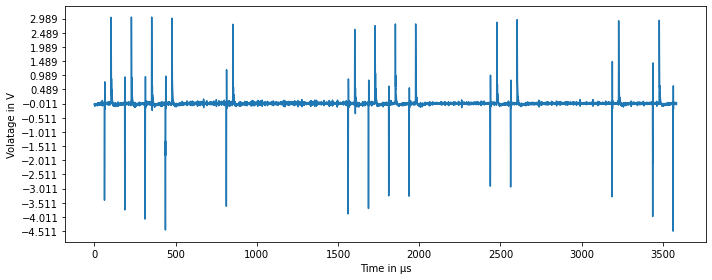

In [73]:
plt.figure(100,figsize=(10,4))
diff_1 = df['voltage'].diff()
plt.plot(df['time'], diff_1)
plt.yticks(np.arange(diff_1.min(), diff_1.max(), 0.5))
plt.xlabel('Time in μs')
plt.ylabel('Volatage in V')
plt.tight_layout()
# plt.savefig('voltage_difference.png')

In [74]:
#Voltage threshold
threshold = df['voltage'].diff().gt(2)
#group by bit
group = (threshold&~threshold.shift(fill_value=False)).cumsum().add(1)
time = lambda i: i['time'].groupby(group).apply(lambda j: j - j.iloc[0])

df_2 = (df.assign(bit=group,time=time)
.pivot(index='bit', columns='time', values='voltage')
)
df_2

time,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,744.5,745.0,745.5,746.0,746.5,747.0,747.5,748.0,748.5,749.0
bit,,,,,,,,,,,,,,,,,,,,,
1,32.965541,32.914965,32.904850,32.864389,32.854273,32.763236,32.743006,32.651969,32.581162,32.510356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.045314,27.543777,29.182444,30.588462,31.114454,31.984364,32.510356,32.793582,33.299344,33.511764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.166697,27.746081,29.415095,30.719960,31.326873,32.125977,32.530586,33.440957,33.511764,33.865797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25.277965,27.877579,29.536477,30.912149,31.367334,32.206899,33.410611,33.157730,33.774760,33.926488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,25.379117,27.978732,29.667975,30.780651,31.670791,32.338397,32.844158,33.329689,33.744414,34.027640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,25.631998,27.634814,28.959909,30.173737,30.659268,31.053762,31.630330,32.125977,32.368742,32.692430,...,21.059913,21.100374,21.100374,21.100374,21.049798,21.090259,21.070028,21.059913,21.059913,21.161065
7,23.528030,26.137759,27.948386,29.253251,30.244544,30.649153,31.428026,32.368742,32.004594,32.550817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,23.639297,26.380525,28.464263,29.971432,30.902034,31.458371,32.520471,32.581162,33.117270,33.400496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,23.740449,26.542369,28.707028,30.295120,30.881803,31.862981,32.368742,32.884619,33.420727,33.734299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df_2.T

bit,1,2,3,4,5,6,7,8,9,10,11,12,13,14
time,,,,,,,,,,,,,,
0.0,32.965541,25.045314,25.166697,25.277965,25.379117,25.631998,23.528030,23.639297,23.740449,23.871948,24.387824,24.499092,24.964393,25.197043
0.5,32.914965,27.543777,27.746081,27.877579,27.978732,27.634814,26.137759,26.380525,26.542369,26.673867,26.694097,27.078476,27.149283,27.371818
1.0,32.904850,29.182444,29.415095,29.536477,29.667975,28.959909,27.948386,28.464263,28.707028,28.889103,28.342880,28.909333,28.626107,28.828411
1.5,32.864389,30.588462,30.719960,30.912149,30.780651,30.173737,29.253251,29.971432,30.295120,30.305235,29.678091,30.295120,29.981548,30.092815
2.0,32.854273,31.114454,31.326873,31.367334,31.670791,30.659268,30.244544,30.902034,30.881803,31.185260,30.315350,31.003186,30.365926,30.659268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747.0,NaN,NaN,NaN,NaN,NaN,21.090259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747.5,NaN,NaN,NaN,NaN,NaN,21.070028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748.0,NaN,NaN,NaN,NaN,NaN,21.059913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


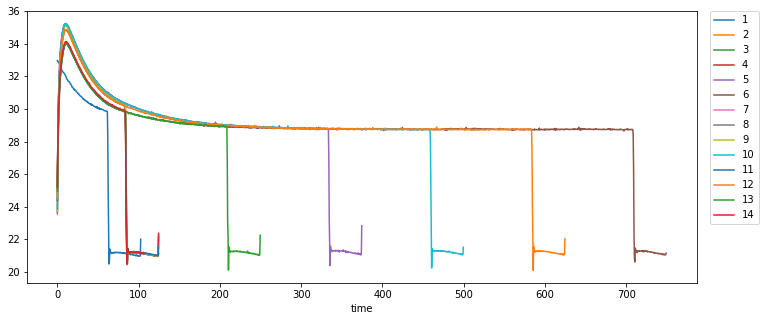

In [76]:
df_2.T.plot(figsize=(12, 5))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# plt.savefig('split_plot.png', dpi=300)
plt.savefig('split.pdf')
plt.show()

In [77]:
# df_2= df_2.fillna(0)
df_3 = df_2.copy()
# df_3.insert(loc= 0, column='bit', value= df_3.index)
df_3.reset_index(drop=True, inplace=True)
df_3 = df_3.rename_axis(None, axis=1)
df_3.head()

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,744.5,745.0,745.5,746.0,746.5,747.0,747.5,748.0,748.5,749.0
0,32.965541,32.914965,32.904850,32.864389,32.854273,32.763236,32.743006,32.651969,32.581162,32.510356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25.045314,27.543777,29.182444,30.588462,31.114454,31.984364,32.510356,32.793582,33.299344,33.511764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.166697,27.746081,29.415095,30.719960,31.326873,32.125977,32.530586,33.440957,33.511764,33.865797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.277965,27.877579,29.536477,30.912149,31.367334,32.206899,33.410611,33.157730,33.774760,33.926488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25.379117,27.978732,29.667975,30.780651,31.670791,32.338397,32.844158,33.329689,33.744414,34.027640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Black & White

In [78]:
# df_values= df_3.drop('bit', axis= 1)
df_values= df_3
# df_values.T.head()

In [79]:
df_values.T.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,206.000000,250.000000,250.000000,250.000000,750.000000,1499.000000,250.000000,250.000000,250.000000,1000.000000,250.000000,1250.000000,500.000000,213.000000
mean,27.088984,28.482308,28.609922,28.656938,29.017728,28.744338,28.093479,28.479598,28.611217,28.947923,28.094895,28.854063,28.666365,29.379240
std,4.825801,5.252465,5.349160,5.379064,3.108170,2.034417,4.945413,5.244916,5.337463,2.690972,4.932593,2.351754,3.526488,4.371220
min,20.493460,20.473230,20.452999,20.473230,20.402423,20.614843,20.473230,20.493460,20.533921,20.250694,20.655304,20.098966,20.119196,20.493460
25%,21.173709,21.181296,21.181296,21.191411,28.848642,28.747489,21.211641,21.201526,21.201526,28.777835,21.221757,28.757605,28.980140,29.930971
50%,30.032124,30.704787,30.816054,30.896976,29.106580,28.777835,30.224313,30.674441,30.826169,28.909333,30.239486,28.808181,29.319000,30.659268
75%,30.950081,32.452193,32.616566,32.745535,30.107988,28.970024,31.822520,32.480010,32.619094,29.617399,31.789645,29.222905,30.226842,32.318166
max,32.965541,34.867205,35.130201,35.231353,35.251583,34.027640,34.037756,34.877320,35.140316,35.221238,34.017525,34.857089,34.017525,34.138908


In [80]:
df_test= pd.read_csv('3_8_1_3_8_1-14.csv')
df_test.columns = ['time', 'voltage']
df_test.head()

,time,voltage
0,0.0,31.276297
1,0.5,31.286413
2,1.0,31.276297
3,1.5,31.256067
4,2.0,31.256067


In [92]:
df_values.index +=1
df_values.apply(pd.DataFrame.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
2,206.0,27.088984,4.825801,20.493460,21.173709,30.032124,30.950081,32.965541
3,250.0,28.482308,5.252465,20.473230,21.181296,30.704787,32.452193,34.867205
4,250.0,28.609922,5.349160,20.452999,21.181296,30.816054,32.616566,35.130201
5,250.0,28.656938,5.379064,20.473230,21.191411,30.896976,32.745535,35.231353
6,750.0,29.017728,3.108170,20.402423,28.848642,29.106580,30.107988,35.251583
7,1499.0,28.744338,2.034417,20.614843,28.747489,28.777835,28.970024,34.027640
8,250.0,28.093479,4.945413,20.473230,21.211641,30.224313,31.822520,34.037756
9,250.0,28.479598,5.244916,20.493460,21.201526,30.674441,32.480010,34.877320
10,250.0,28.611217,5.337463,20.533921,21.201526,30.826169,32.619094,35.140316
11,1000.0,28.947923,2.690972,20.250694,28.777835,28.909333,29.617399,35.221238


In [84]:
df_values.stack().median()

28.94979396

In [85]:
df_to_array=df_values.iloc[:,:200] #iloc = location, loc=label
df_to_array.stack().median()

31.00318605

In [86]:
#apply condition on entire dataframe.#Method 2
df_binary = df_values.applymap(lambda x: 1 if x>=31.00 else 0)
df_binary.T.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
0.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2.0,1,1,1,1,1,0,0,0,0,1,0,1,0,0
2.5,1,1,1,1,1,1,0,1,1,1,1,1,1,1
3.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [87]:
df_wh.head()

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,95.0,95.5,96.0,96.5,97.0,97.5,98.0,98.5,99.0,99.5
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df_value_count= df_wh.apply(pd.Series.value_counts, axis=1)
print('Sum of 0: ',df_value_count[0].sum())
print('Sum of 255: ' ,df_value_count[255].sum())

Sum of 0:  1391
Sum of 255:  1409


### Subplot

In [89]:
df_trans= pd.read_csv('transposed_bit.csv')
df_trans.head()

,time,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,32.965541,25.045314,25.166697,25.277965,25.379117,25.631998,23.528030,23.639297,23.740449,23.871948,24.387824,24.499092,24.964393,25.197043
1,0.5,32.914965,27.543777,27.746081,27.877579,27.978732,27.634814,26.137759,26.380525,26.542369,26.673867,26.694097,27.078476,27.149283,27.371818
2,1.0,32.904850,29.182444,29.415095,29.536477,29.667975,28.959909,27.948386,28.464263,28.707028,28.889103,28.342880,28.909333,28.626107,28.828411
3,1.5,32.864389,30.588462,30.719960,30.912149,30.780651,30.173737,29.253251,29.971432,30.295120,30.305235,29.678091,30.295120,29.981548,30.092815
4,2.0,32.854273,31.114454,31.326873,31.367334,31.670791,30.659268,30.244544,30.902034,30.881803,31.185260,30.315350,31.003186,30.365926,30.659268


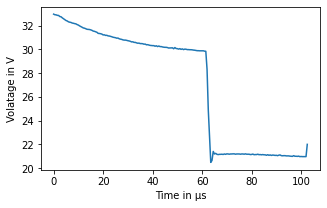

In [90]:
#First bit plot
plt.figure(100,figsize=(5,3))
plt.plot(df_trans['time'], df_trans['0'])
plt.xlabel('Time in μs')
plt.ylabel('Volatage in V')
plt.show()

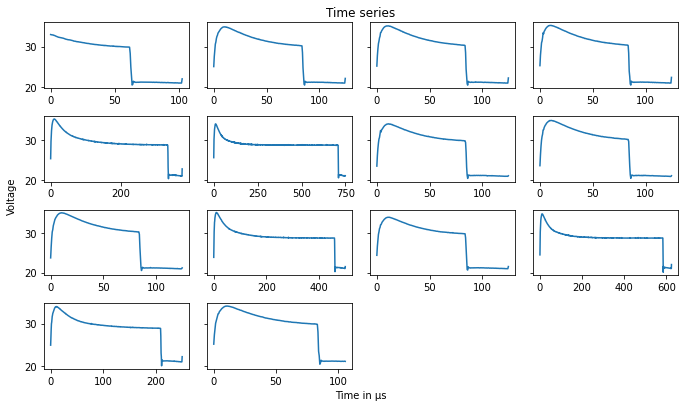

In [91]:
#plotting subplot of all individual signal
rows = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3]
cols = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
df_cols = range(14)
zipped = zip(rows,cols,df_cols)

#plt.subplots(nrows, ncols)
fig, axs = plt.subplots(4,4, sharey='row' , figsize=(10,6)) #sharex='col', sharey='row' 
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

for i,j,k in zipped:
    axs[i,j].plot(df_trans['time'], df_trans[f'{k}']) #['{}'.format(k)]
    
axs[3,2].axis('off')
axs[3,3].set_visible(False)

plt.title('Time series')
plt.ylabel('Voltage')
plt.xlabel('Time in μs')
plt.tight_layout()